# Exploratory Data Analysis

## Importing and preprocessing

In [177]:
import pandas as pd

#Final annotation dataset
af = pd.read_csv("data/interim/Annotazione_Finale.csv")

In [178]:
af.head()

,tweet_id,tweet,Final_Class,Class,Irony
0,1462002288835403777,In arrivo un nuovo #bonus #inps! Scopri chi pu...,pos,pos,no
1,1354381987507744771,"Allora, riepiloghiamo;\nAi politici la pension...",neg_ir,neg,yes
2,1454050817821003783,Caro @INPS_it e cari @Europarl_IT fate bene i...,neg_ir,neg,yes
3,1393675898960982016,"FOTO - A #napoli, dopo l'apertura di una #vora...",neut,neut,no
4,1417876270705164289,Maxi esercitazione di #protezionecivile. Lo sc...,neut,neut,no


In [180]:
#Import annotation files to get other informations
ann1 = pd.read_csv("data/interim/Annotazione_1.csv")
ann2 = pd.read_csv("data/interim/Annotazione_2.csv")
ann = pd.concat([ann1,ann2])

#Merging files on tweet_id column
gs = ann.merge(af, how='inner', on='tweet_id')
gs = gs.drop_duplicates(keep='first',subset=['tweet_id'])

In [181]:
gs.head()

,Unnamed: 0,created_at,tweet_id,tweet_x,type,polarity,topic,tweet_y,Final_Class,Class,Irony
0,24072,2021-11-20 10:18:03+00:00,1462002288835403777,In arrivo un nuovo #bonus #inps! Scopri chi pu...,hashtag,positive,inps,In arrivo un nuovo #bonus #inps! Scopri chi pu...,pos,pos,no
1,470,2021-01-27 10:53:23+00:00,1354381987507744771,"Allora, riepiloghiamo;\nAi politici la pension...",hashtag,negative,inps,"Allora, riepiloghiamo;\nAi politici la pension...",neg_ir,neg,yes
2,31123,2021-10-29 11:41:44+00:00,1454050817821003783,Caro @INPS_it e cari @Europarl_IT fate bene i...,mention,positive,inps,Caro @INPS_it e cari @Europarl_IT fate bene i...,neg_ir,neg,yes
3,8077,2021-05-15 21:13:22+00:00,1393675898960982016,"FOTO - A #napoli, dopo l'apertura di una #vora...",hashtag,neutral,pc,"FOTO - A #napoli, dopo l'apertura di una #vora...",neut,neut,no
4,16865,2021-07-21 15:57:00+00:00,1417876270705164289,Maxi esercitazione di #protezionecivile. Lo sc...,mention,neutral,pc,Maxi esercitazione di #protezionecivile. Lo sc...,neut,neut,no


In [182]:
gs = gs[['created_at','tweet_id','tweet_x','Final_Class','Class','Irony']]

In [183]:
gs.head()

,created_at,tweet_id,tweet_x,Final_Class,Class,Irony
0,2021-11-20 10:18:03+00:00,1462002288835403777,In arrivo un nuovo #bonus #inps! Scopri chi pu...,pos,pos,no
1,2021-01-27 10:53:23+00:00,1354381987507744771,"Allora, riepiloghiamo;\nAi politici la pension...",neg_ir,neg,yes
2,2021-10-29 11:41:44+00:00,1454050817821003783,Caro @INPS_it e cari @Europarl_IT fate bene i...,neg_ir,neg,yes
3,2021-05-15 21:13:22+00:00,1393675898960982016,"FOTO - A #napoli, dopo l'apertura di una #vora...",neut,neut,no
4,2021-07-21 15:57:00+00:00,1417876270705164289,Maxi esercitazione di #protezionecivile. Lo sc...,neut,neut,no


## Tweet Cleaning - Feature Engineering

In [184]:
from nltk.corpus import stopwords

#Keep original tweets
gs['tweetOrig']=gs['tweet_x']

#Adding a space before and after each stopword in such a way not to consider the case in which the stopword is contained in a word
words = set(stopwords.words('italian'))
stopwords = [' ' + x + ' ' for x in words]

emoticons = ["😀","😃","😄","😁","😆","🤣","😂","🙂","😊","😍","🥰","🤩","☺","🥳","😒","😔","😟","🙁","☹","😥","😢","😭","😱","😞","😓","😩","😫","😡","😠","🤬"]

gs.tweet_x = gs.tweet_x.replace("@[\w]*[_-]*[\w]*"," ",regex=True)   # tag removal
gs.tweet_x = gs.tweet_x.replace("https?://[\w/%-.]*"," ",regex=True) # Url removal
# Removing everything except the letters of the alphabet and the emoticons
gs.tweet_x = gs.tweet_x.replace('[^ a-zA-Zà-ú'
                            '\😀\😃\😄\😁\😆\🤣\😂\🙂\😊\😍\🥰\🤩\☺\🥳\😒\😔\😟\🙁\☹\😥\😭\😱\😞\😓\😩\😫\😡\😠\🤬]', " ",regex=True)    
for word in emoticons:
    gs.tweet = gs.tweet_x.replace(word, " "+word+" ",regex=True) 

gs.tweet_x = gs.tweet_x.replace('\s+', ' ',regex=True)# Removal of excess spaces
gs.tweet_x = gs.tweet_x.replace('^ ', '', regex=True)# Removing the space at the beginning
gs.tweet_x = gs.tweet_x.replace(' $', '', regex=True)# Removing the space at the end
gs.tweet_x = gs.tweet_x.apply(lambda x: x.lower())# Making everything in lowercase
gs.tweet_x = gs.tweet_x.replace('^', ' ', regex=True) 
gs.tweet_x = gs.tweet_x.replace('$', ' ', regex=True)

for word in stopwords:
    gs.tweet = gs.tweet.replace(word, ' ',regex=True)

# Removing the spaces at the beginning and at the end of every tweet
gs.tweet_x = gs.tweet_x.apply(lambda x: x.strip())
# Removing the empty tweets
gs = gs[gs.tweet_x != '']

C:\Users\polic\AppData\Local\Temp\ipykernel_37200\3847841518.py:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  gs.tweet = gs.tweet_x.replace(word, " "+word+" ",regex=True)


In [185]:
gs.head()

,created_at,tweet_id,tweet_x,Final_Class,Class,Irony,tweetOrig
0,2021-11-20 10:18:03+00:00,1462002288835403777,in arrivo un nuovo bonus inps scopri chi può o...,pos,pos,no,In arrivo un nuovo #bonus #inps! Scopri chi pu...
1,2021-01-27 10:53:23+00:00,1354381987507744771,allora riepiloghiamo ai politici la pensione d...,neg_ir,neg,yes,"Allora, riepiloghiamo;\nAi politici la pension..."
2,2021-10-29 11:41:44+00:00,1454050817821003783,caro e cari fate bene i vostri conti perché no...,neg_ir,neg,yes,Caro @INPS_it e cari @Europarl_IT fate bene i...
3,2021-05-15 21:13:22+00:00,1393675898960982016,foto a napoli dopo l apertura di una voragine ...,neut,neut,no,"FOTO - A #napoli, dopo l'apertura di una #vora..."
4,2021-07-21 15:57:00+00:00,1417876270705164289,maxi esercitazione di protezionecivile lo scen...,neut,neut,no,Maxi esercitazione di #protezionecivile. Lo sc...


In [186]:
#Get year, month and day informations from created_at column
gs['year'] = gs['created_at'].str[:4]
gs['month'] = gs['created_at'].str[5:7]
gs['day'] = gs['created_at'].str[8:10]

gs = gs.reindex(columns=['tweet_id','year','month','day','tweetOrig','tweet_x','Final_Class','Class','Irony'])

In [187]:
gs.head()

,tweet_id,year,month,day,tweetOrig,tweet_x,Final_Class,Class,Irony
0,1462002288835403777,2021,11,20,In arrivo un nuovo #bonus #inps! Scopri chi pu...,in arrivo un nuovo bonus inps scopri chi può o...,pos,pos,no
1,1354381987507744771,2021,01,27,"Allora, riepiloghiamo;\nAi politici la pension...",allora riepiloghiamo ai politici la pensione d...,neg_ir,neg,yes
2,1454050817821003783,2021,10,29,Caro @INPS_it e cari @Europarl_IT fate bene i...,caro e cari fate bene i vostri conti perché no...,neg_ir,neg,yes
3,1393675898960982016,2021,05,15,"FOTO - A #napoli, dopo l'apertura di una #vora...",foto a napoli dopo l apertura di una voragine ...,neut,neut,no
4,1417876270705164289,2021,07,21,Maxi esercitazione di #protezionecivile. Lo sc...,maxi esercitazione di protezionecivile lo scen...,neut,neut,no


In [188]:
#Gold Standard dataset
gs.to_csv("data/processed/Gold_Standard.csv")

# Ngrams


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import string
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
ADDITIONAL_STOPWORDS = ['La']
stopword = nltk.corpus.stopwords.words('italian') + ADDITIONAL_STOPWORDS

#Utility to tokenize and remove stopwords from tweets
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation])#punctuation
    tokens = word_tokenize(text_lc)#tokenizzazione
    text = [word for word in tokens if word not in stopword]#rimozione stopwords
    return text

In [24]:
#Get ngrams per month
def ngrams(df,month,n,top):
    words = clean_text((''.join(str(gs['tweet_x'][gs['month']==month].tolist()))))
    ng = (pd.Series(nltk.ngrams(words, n)).value_counts())[:top]
    return ng 

In [25]:
ng = ngrams(gs,11,3,10)
ng

(google, alert, inps)             15
(selezionate, google, alert)      15
(alert, inps, reddito)             3
(alert, inps, inps)                3
(inps, reddito, cittadinanza)      3
(soggiorno, reddito, libertà)      2
(mancava, proprio, bonus)          2
(proprio, bonus, falseaccuse)      2
(bonus, falseaccuse, metoo)        2
(falseaccuse, metoo, migranti)     2
dtype: int64

# Sentiment distribution visualization

In [138]:
grouped = gs.groupby(["month","Class"]).size()
grouped = grouped.to_frame()
grouped = grouped.reset_index()

## Grouped bar chart

In [139]:
#dataframe to visualize
df = pd.DataFrame([['1',17,73,61,3], ['2',7,43,47,2], ['3',7,105,62,1],['4',17,101,71,4],['5',23,133,93,7],['6',24,109,76,5],['7',13,79,90,2],['8',8,63,62,3],['9',8,42,66,2],['10',12,65,70,2],['11',10,55,62,0],['12',12,30,50,0]],
				columns=['Month','Pos','Neg','Neut','Mix'])

<AxesSubplot:title={'center':'Sentiment distribution'}, xlabel='Month'>

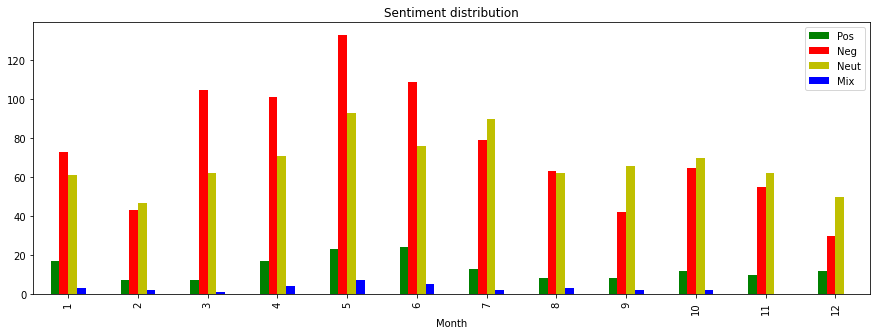

In [167]:
#Grouped bar chart
df.plot(x='Month',
		kind='bar',
		stacked=False,
		title='Sentiment distribution',
		figsize=(15,5),
		color=['g', 'r', 'y','b'])
